<a href="https://colab.research.google.com/github/anuragduk2024/AIML-LAB/blob/main/clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

data = [(random.randint(1, 1000), random.randint(1, 1000)) for _ in range(1000)]

print("Generated Data:", data)

centroids = random.sample(data, 3)
print("Selected Random Centroids:", centroids)

Generated Data: [(318, 197), (964, 413), (654, 169), (400, 579), (408, 568), (570, 900), (263, 795), (552, 723), (321, 692), (59, 72), (399, 296), (723, 396), (285, 692), (465, 171), (466, 849), (650, 110), (855, 293), (348, 479), (834, 409), (177, 837), (721, 293), (603, 827), (131, 319), (621, 976), (711, 774), (896, 924), (911, 345), (16, 995), (835, 293), (835, 246), (102, 461), (397, 74), (328, 905), (680, 763), (422, 461), (380, 41), (372, 949), (653, 504), (658, 671), (358, 915), (897, 92), (579, 721), (978, 299), (481, 213), (397, 877), (161, 16), (591, 807), (899, 766), (808, 80), (734, 472), (764, 559), (504, 349), (237, 937), (613, 366), (340, 786), (484, 932), (248, 723), (271, 351), (962, 38), (845, 36), (815, 561), (460, 732), (506, 810), (797, 668), (302, 413), (922, 489), (47, 5), (953, 876), (330, 989), (493, 575), (988, 705), (1000, 620), (616, 921), (896, 653), (399, 172), (407, 533), (220, 572), (312, 456), (680, 613), (963, 835), (374, 496), (785, 678), (637, 352),

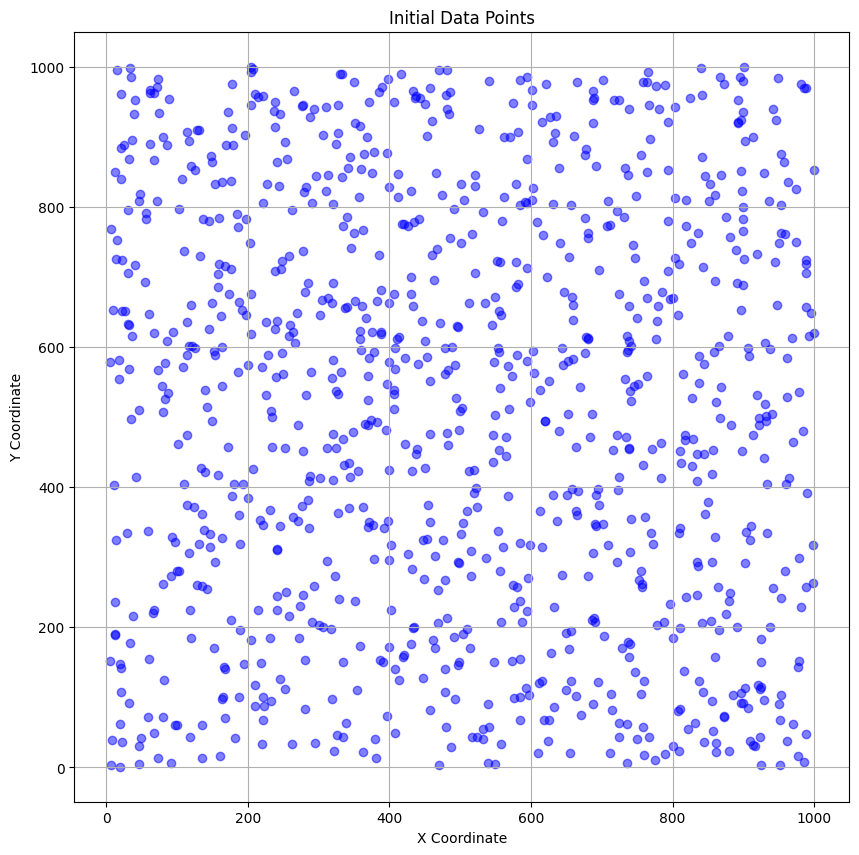

In [ ]:
x_values, y_values = zip(*data)
plt.figure(figsize=(10, 10))
plt.scatter(x_values, y_values, color='blue', alpha=0.5)
plt.title('Initial Data Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.show()

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        clusters[closest_centroid].append(point)
    return clusters

def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:
            new_centroid = (np.mean([p[0] for p in cluster]), np.mean([p[1] for p in cluster]))
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(random.choice(data))
    return new_centroids

max_iterations = 100
for iteration in range(max_iterations):
    print(f"\nIteration {iteration + 1}:")

    clusters = assign_clusters(data, centroids)

    for i, cluster in enumerate(clusters):
        print(f"Cluster {i + 1}: {np.array(cluster)}")

    new_centroids = update_centroids(clusters)

    print("New Centroids:", new_centroids)

    if np.array_equal(new_centroids, centroids):
        print("Centroids have converged.")
        break

    centroids = new_centroids

print("\nFinal Centroids:", centroids)

Streaming output truncated to the last 5000 lines.
 [ 734  472]
 [ 764  559]
 [ 815  561]
 [ 797  668]
 [ 922  489]
 [ 953  876]
 [ 988  705]
 [1000  620]
 [ 616  921]
 [ 896  653]
 [ 680  613]
 [ 963  835]
 [ 785  678]
 [ 661  901]
 [ 801  670]
 [ 942  939]
 [ 904  336]
 [ 535  663]
 [ 869  846]
 [ 689  955]
 [ 946  924]
 [ 898  452]
 [ 948  660]
 [ 789  974]
 [ 841  871]
 [ 889  739]
 [ 844  576]
 [ 900  782]
 [ 843  714]
 [ 899  800]
 [ 819  772]
 [ 625  551]
 [ 846  844]
 [ 767  946]
 [ 680  755]
 [ 781  939]
 [ 676  784]
 [ 778  637]
 [ 826  748]
 [ 840  998]
 [ 554  599]
 [ 521  845]
 [ 776  611]
 [ 861  522]
 [ 846  361]
 [ 808  645]
 [ 731  786]
 [ 676  874]
 [ 910  325]
 [ 960  405]
 [ 953  802]
 [ 634  906]
 [ 933  335]
 [ 594  869]
 [ 677  592]
 [ 751  547]
 [ 548  578]
 [ 922  498]
 [ 696  710]
 [ 803  727]
 [ 657  802]
 [ 620  495]
 [ 584  981]
 [ 891  692]
 [ 961  585]
 [ 851  808]
 [ 549  672]
 [ 739  455]
 [ 747  727]
 [ 733  554]
 [ 678  614]
 [ 737  596]
 [ 900  936]


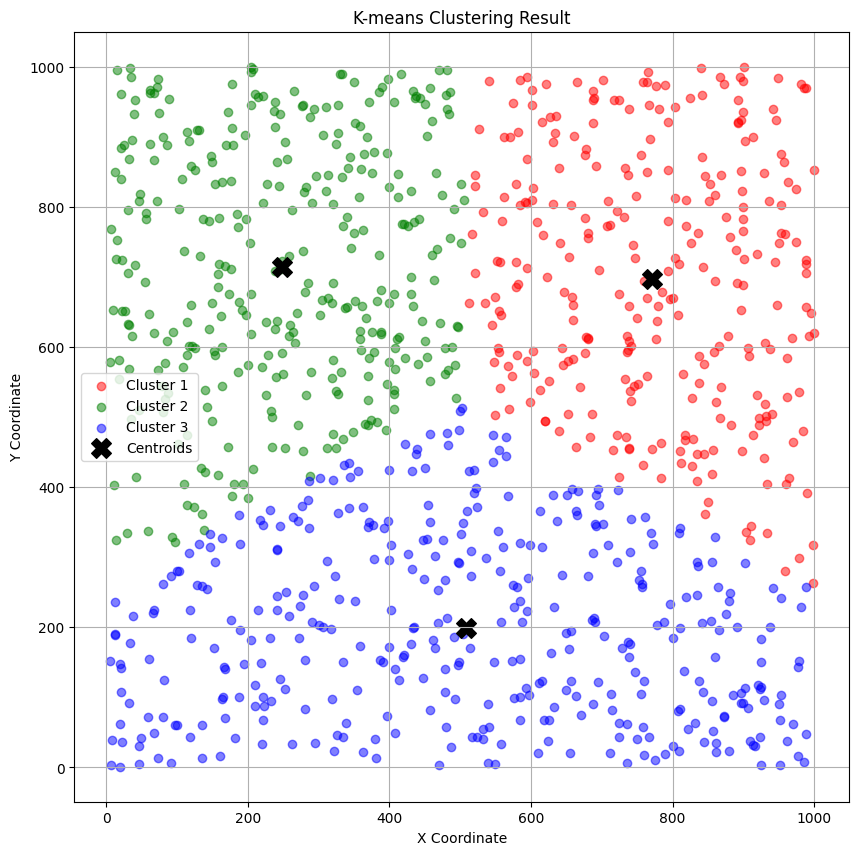

In [ ]:
plt.figure(figsize=(10, 10))

colors = ['r', 'g', 'b']

for i, cluster in enumerate(clusters):
    x_coords, y_coords = zip(*cluster) if cluster else ([], [])
    plt.scatter(x_coords, y_coords, color=colors[i], alpha=0.5, label=f'Cluster {i + 1}')

centroid_x, centroid_y = zip(*centroids)
plt.scatter(centroid_x, centroid_y, c='black', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering Result')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()